# Exploratory Data Analysis for ICO Fraud Detection Project

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import plotly.graph_objects as go
import pickle
from ico_parser import ICOParser

#pd.options.plotting.backend = "plotly"

In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=';')
df_info.set_index('ico',inplace=True)
df_info.market_start_date = pd.to_datetime(df_info.market_start_date)

In [3]:
df_info.head()

,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price_zero,Market Cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
ico,,,,,,,,,,,,,,,,,
0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,08/11/2017,2017-08-15,4,1140,NaN,NaN,45.0,x,2,6,14,02/11/2018,NaN,NaN,NaN
AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,18/12/2017,2017-12-21,3,1012,NaN,NaN,154.0,x,13,10,0,19/06/2018,NaN,NaN,NaN
AMPLEFORTH,0xd46ba6d942050d489dbd938a2c909a5d5039a161,0,14/06/2019,2019-06-27,13,459,NaN,NaN,47.0,x,3,4,20,24/12/2019,NaN,NaN,NaN
ANKR,0x8290333cef9e6d528dd5618fb97a76f268f3edd4,0,21/02/2019,2019-03-05,12,573,NaN,NaN,170.0,x,11,7,41,09/01/2019,NaN,NaN,NaN
BANCOR,0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c,0,06/10/2017,2017-06-12,2,1204,NaN,NaN,61.0,x,2,11,7,12/09/2017,NaN,NaN,NaN


## 2. Extracting the data

In [4]:
path_to_csvs = '/home/gabriel/Documents/Repos/time_series_study/data_and_models/all_icos/'
list_icos = df_info.index.to_list()

In [ ]:
%%time
list_values = []
for ico in list_icos:
    #print(ico)
    ico_csv= f'{path_to_csvs}{ico}.csv'
    is_fraud = df_info.at[ ico, 'fraud']
    try:
        df_current_ico = pd.read_csv(ico_csv)
        number_transactions = df_current_ico.shape[0] 
        list_values.append([ico,
                           number_transactions,
                           df_current_ico.RECEIPT_GAS_USED.astype(float).sum()/number_transactions,
                           df_current_ico.GAS.astype(float).sum()/number_transactions,
                           len(df_current_ico.FROM_ADDRESS.unique())/number_transactions,
                           len(df_current_ico.TO_ADDRESS.unique())/number_transactions,
                           is_fraud]
                           )
    except FileNotFoundError:
        print(f'Error on ICO: {ico}')
    
    

In [ ]:
df_eda = pd.DataFrame(list_values, columns=['ico', 
                                   'Número de Transações', 
                                   'Média Gas Receipt', 
                                   'Média Gas',
                                   'Média From Adress',
                                   'Média To Address',
                                   'Fraude'])
df_eda.head()

## 2. Visual exploration of data

### 2.1. Boxplot - Total transactions

In [ ]:
import plotly.express as px
fig = px.box(df_eda, x="Fraude", y="Número de Transações", points="all", log_y=True, color='Fraude')
fig.show()

### 2.2. Boxplot - Média Gas Receipt

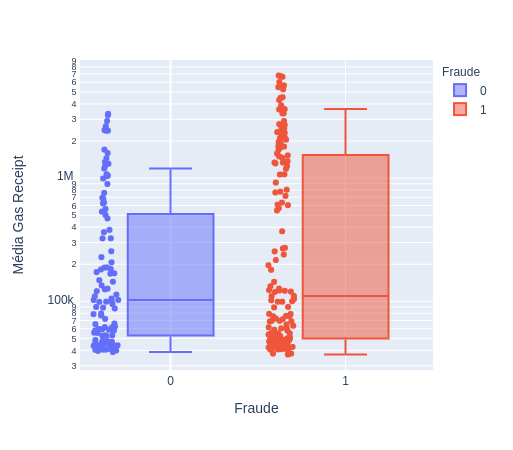

In [8]:
fig = px.box(df_eda, x="Fraude", y="Média Gas Receipt", points="all", log_y=True, color='Fraude')
fig.show()

### 2.3. Boxplot - Média Gas

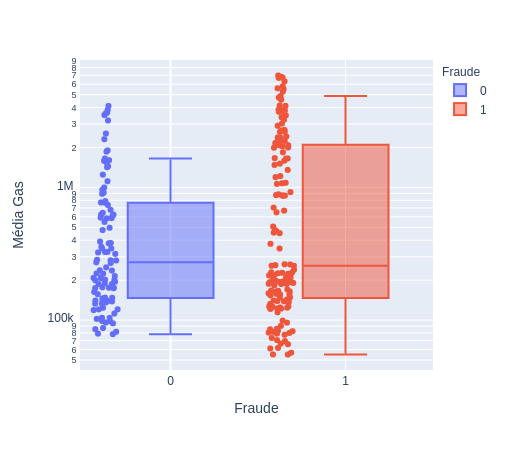

In [9]:
fig = px.box(df_eda, x="Fraude", y="Média Gas", points="all", log_y=True, color='Fraude')
fig.show()

### 2.4. Boxplot - Média From Adress

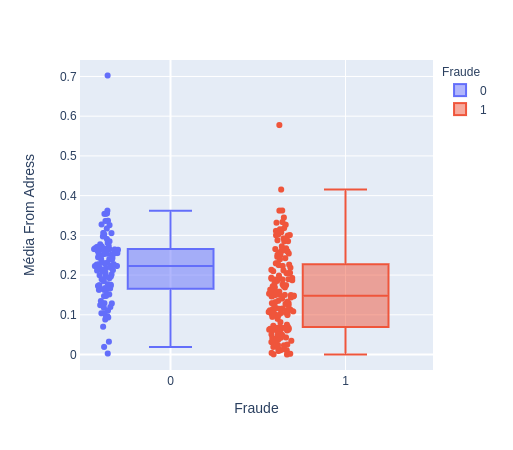

In [10]:
fig = px.box(df_eda, x="Fraude", y="Média From Adress", points="all", log_y=False, color='Fraude')
fig.show()

### 2.5. Boxplot - Média To Adress

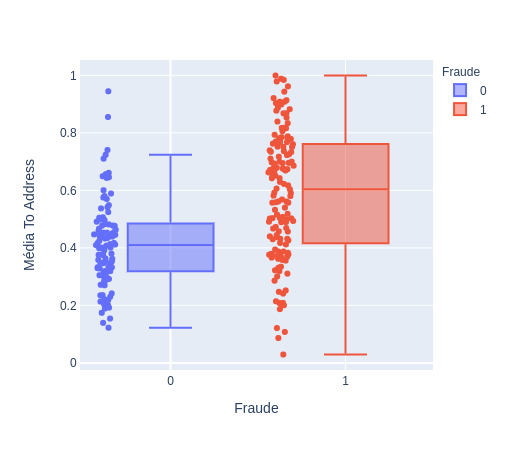

In [24]:
fig = px.box(df_eda, x="Fraude", y="Média To Address", points="all", log_y=False, color='Fraude')
fig.show()

### 2.6. Boxplot - Média Newbiers

In [25]:
df_eda

,ico,Número de Transações,Média Gas Receipt,Média Gas,Média From Adress,Média To Address,Fraude
0,0X,301485,5.876486e+04,1.475736e+05,0.223255,0.332806,0
1,0XCERT,21145,5.786318e+04,1.220356e+05,0.143580,0.783921,1
2,4NEW,22563,1.527679e+06,1.651859e+06,0.172583,0.501972,1
3,ABULABA,4214,4.109039e+04,1.244334e+05,0.204794,0.387518,1
4,AELF,109117,1.308478e+06,1.595182e+06,0.163256,0.375835,0
...,...,...,...,...,...,...,...
249,WAX,86889,8.996399e+04,2.012845e+05,0.189253,0.334968,0
250,WAYKICHAIN,53424,4.585061e+04,1.021145e+05,0.247230,0.304900,0
251,ZILLIQA,194206,4.750134e+04,1.948039e+05,0.217645,0.331890,0
252,ZPAY,10866,5.657279e+06,5.782420e+06,0.062581,0.898767,1


In [42]:
ico_parser = ICOParser(ico_csv,
                     date_column='BLOCK_TIMESTAMP',
                     value_column='VALUE',
                     ico_start_date=market_start_date, 
                     fraud_flag=is_fraud)

In [52]:
list_newbiers_ratio = []

In [ ]:
%%time
for ico in list_icos[10:]:
    ico_csv= f'{path_to_csvs}{ico}.csv'
    market_start_date = str(df_info.at[ ico, 'market_start_date'].date())
    is_fraud = df_info.at[ ico, 'fraud']
    try:
        print(ico)
        ico_parser = ICOParser(ico_csv,
                     date_column='BLOCK_TIMESTAMP',
                     value_column='VALUE',
                     ico_start_date=market_start_date, 
                     fraud_flag=is_fraud,
                          len_time_series=20)
        ico_parser.get_newbiers_dataframe()
        list_newbiers_ratio.append([ico, 
                                    ico_parser.df_newbiers.shape[0]/ico_parser.df.shape[0],
                                    is_fraud]                                    
                                    )
        
    except:
        print(f'PROBLEM WITH: {ico}')

In [59]:
df_newbiers_boxplot = pd.DataFrame(list_newbiers_ratio, columns=['ico', 'Proporção de transações Newbiers sobre total', 'Fraude'])
df_newbiers_boxplot

,ico,Proporção de transações Newbiers sobre total,Fraude
0,0X,0.449505,0
1,0XCERT,0.180390,1
2,4NEW,0.249544,1
3,ABULABA,0.566799,1
4,AELF,0.674652,0
...,...,...,...
246,WAX,0.574974,0
247,WAYKICHAIN,0.236085,0
248,ZILLIQA,0.147320,0
249,ZPAY,0.922232,1


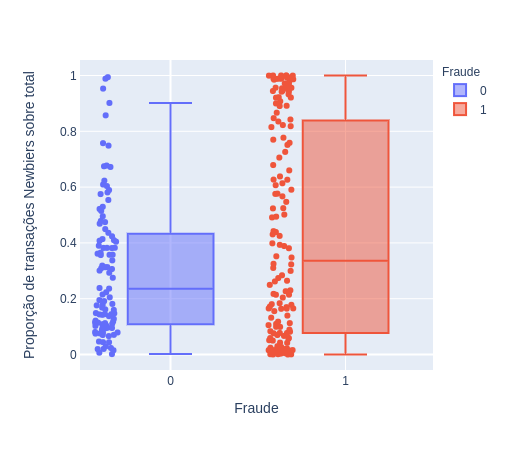

In [60]:
fig = px.box(df_newbiers_boxplot, x="Fraude", y="Proporção de transações Newbiers sobre total", points="all", log_y=False, color='Fraude')
fig.show()

## 3. Histogram with Difference between transactions

In [29]:
%%time
dict_ico_diff = {}
for ico in list_icos[:3]:
    #print(ico)
    ico_csv= f'{path_to_csvs}{ico}.csv'
    is_fraud = df_info.at[ ico, 'fraud']
    try:
        df_current_ico = pd.read_csv(ico_csv)
        df_current_ico.BLOCK_TIMESTAMP = pd.to_datetime(df_current_ico.BLOCK_TIMESTAMP)
        df_current_ico.sort_values(by='BLOCK_TIMESTAMP', inplace=True)

        dict_ico_diff[ico] = df_current_ico.BLOCK_TIMESTAMP.diff().dt.seconds
    except (FileNotFoundError, TypeError):
        print(f'Error on ICO: {ico}')
    

CPU times: user 50.2 s, sys: 214 ms, total: 50.4 s
Wall time: 50.7 s


In [43]:
dict_ico_diff

{'0X': 33624       NaN
 33625     162.0
 33626     274.0
 242537     83.0
 242538     85.0
           ...  
 180730    224.0
 82570     118.0
 82572      69.0
 288793     53.0
 180735    225.0
 Name: BLOCK_TIMESTAMP, Length: 301485, dtype: float64,
 'AELF': 72276        NaN
 72275     1441.0
 84420    61186.0
 84419    23728.0
 84418     4388.0
           ...   
 50393      540.0
 50513     1023.0
 50406      356.0
 50475     2084.0
 50408      181.0
 Name: BLOCK_TIMESTAMP, Length: 109117, dtype: float64,
 'AMPLEFORTH': 16100        NaN
 16099     2273.0
 15206    60856.0
 15201     3019.0
 15202      102.0
           ...   
 5054         0.0
 5058      2648.0
 5057         0.0
 5050      5937.0
 5044        69.0
 Name: BLOCK_TIMESTAMP, Length: 16135, dtype: float64}

In [33]:
dict_ico_diff_min = {key:value/60 for key,value in dict_ico_diff.items()}

In [39]:
dict_ico_diff_min.get('0X')

33624          NaN
33625     2.700000
33626     4.566667
242537    1.383333
242538    1.416667
            ...   
180730    3.733333
82570     1.966667
82572     1.150000
288793    0.883333
180735    3.750000
Name: BLOCK_TIMESTAMP, Length: 301485, dtype: float64

In [48]:
import seaborn as sns

In [51]:
df_ = pd.DataFrame(dict_ico_diff.get('AELF'))
df_

,BLOCK_TIMESTAMP
72276,NaN
72275,1441.0
84420,61186.0
84419,23728.0
84418,4388.0
...,...
50393,540.0
50513,1023.0
50406,356.0
50475,2084.0


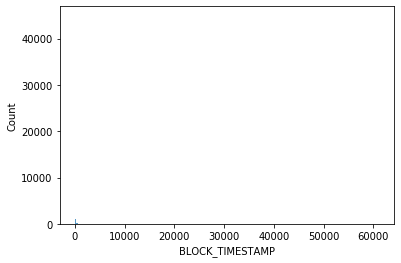

In [52]:
sns.histplot(data=df_, x="BLOCK_TIMESTAMP")


In [55]:
list(range(0, 600, 60))

[0, 60, 120, 180, 240, 300, 360, 420, 480, 540]

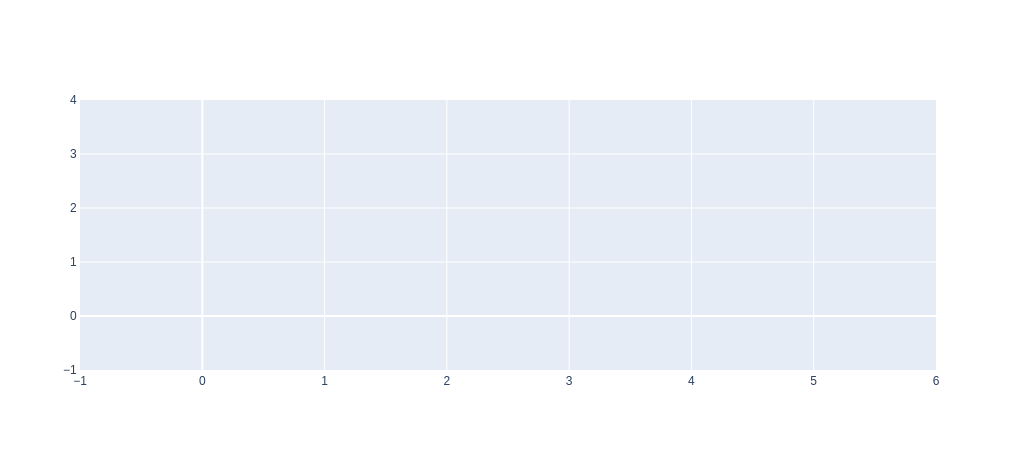

In [63]:
fig = go.Figure(data=[go.Histogram(x=dict_ico_diff.get('AELF'),
                                   xbins=dict(
                      start=0,
                      end=0,
                      size=60),
                      #autobinx=False
                                  )])
fig.show()

In [59]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(x=dict_ico_diff_min.get('AELF').tolist(), bins=range(0, 600, 60))#, nbins=20)
fig.show()

TypeError: histogram() got an unexpected keyword argument 'bins'

## 4. Autocorrelation
https://www.statology.org/autocorrelation-python/

In [5]:
path_to_csvs = '/home/gabriel/Documents/Repos/time_series_study/data_and_models/all_icos/'
list_icos = df_info.index.to_list()

In [14]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

In [27]:
def plot_autocorrelation(ico, file_name, title='Autocorrelação'):
    ico_csv= f'{path_to_csvs}{ico}.csv'
    market_start_date = str(df_info.at[ ico, 'market_start_date'].date())
    is_fraud = df_info.at[ ico, 'fraud']
    ico_parser = ICOParser(ico_csv,
                         date_column='BLOCK_TIMESTAMP',
                         value_column='VALUE',
                         ico_start_date=market_start_date, 
                         fraud_flag=is_fraud,
                              len_time_series=60)
    ico_parser.get_array_autocorrelation_transactions(nlags=60)
    
    # plot autocorrelation function
    fig = tsaplots.plot_acf(ico_parser.array_autocorrelation_transactions, lags=50)
    plt.title(title)
    fig.show()
    fig.savefig(file_name, dpi=300)

/home/gabriel/miniconda3/envs/deeplearning/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/home/gabriel/miniconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


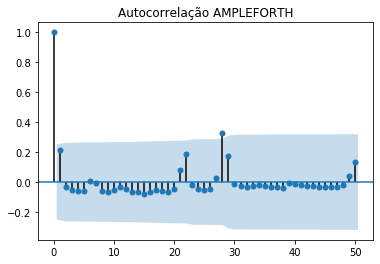

In [28]:
plot_autocorrelation('AMPLEFORTH', 'autocorr_ampleforth.png', title='Autocorrelação AMPLEFORTH')